In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [4]:
video_games_df= pd.read_csv('Video_Games_Sales.csv')

In [5]:
video_games_df

,Unnamed: 0,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
16700,16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
16701,16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E
16702,16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.964461,26.364855,7.099509,162.339575,Ubisoft,E


In [6]:
video_games_df = video_games_df.drop(columns=['Unnamed: 0'])

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

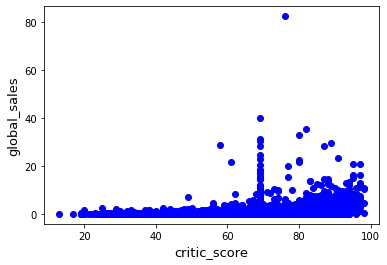

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = video_games_df['critic_score'], y = video_games_df['global_sales'],color='blue')
plt.ylabel('global_sales', fontsize=13)
plt.xlabel('critic_score', fontsize=13)
plt.show()

There is 1 outlier in it so need to drop it.

In [7]:
video_games_df = video_games_df.drop(video_games_df[(video_games_df['critic_score']>60) & (video_games_df['global_sales']>60)].index)

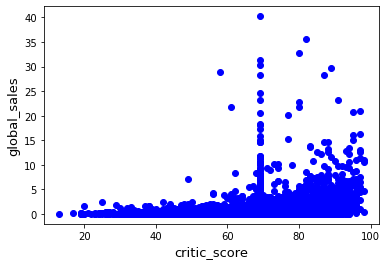

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = video_games_df['critic_score'], y = video_games_df['global_sales'],color='blue')
plt.ylabel('global_sales', fontsize=13)
plt.xlabel('critic_score', fontsize=13)
plt.show()

Here, it can be seen that there are more outliers in the data. But removing too many data point will tamper the data. So will keep that as it is.

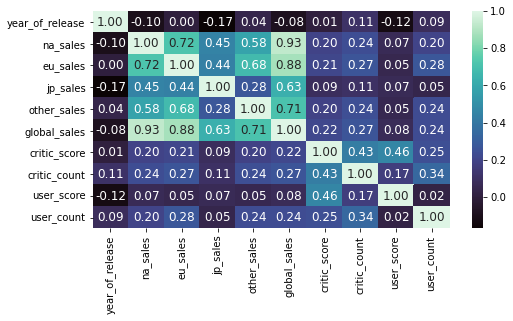

In [9]:
plt.subplots(figsize=(8,4))
sns.heatmap(video_games_df.corr(), annot=True, fmt=".2f",cmap="mako",annot_kws={'size':12})
plt.show()

According to correlation table global sales have strong correlation with NA and EU sales but on other hand not so much strong correlation with JP sales. Critic score has only 0.22 correlation with global sales

In [10]:
count=video_games_df['platform'].value_counts().reset_index()
count.columns=['platform', 'Count']
count
px.bar(count, x='platform', y='Count')

PS2 is the most preffered platform by games player with count 2160 and then followed by DS with the most no of counts.

In [11]:
count=video_games_df['year_of_release'].value_counts().reset_index()
count.columns=['year_of_release', 'Count']
count
px.bar(count, x='year_of_release', y='Count')

Bar plot showing the max games were release in the year 2007. The period between 2007 to 2010 max games were released after that it started decreasing.

In [12]:
count=video_games_df['genre'].value_counts().reset_index()
count.columns=['genre', 'Count']
count
px.bar(count, x='genre', y='Count',color="genre")

Bar plot showing that Action games were played the most followed by sports. 

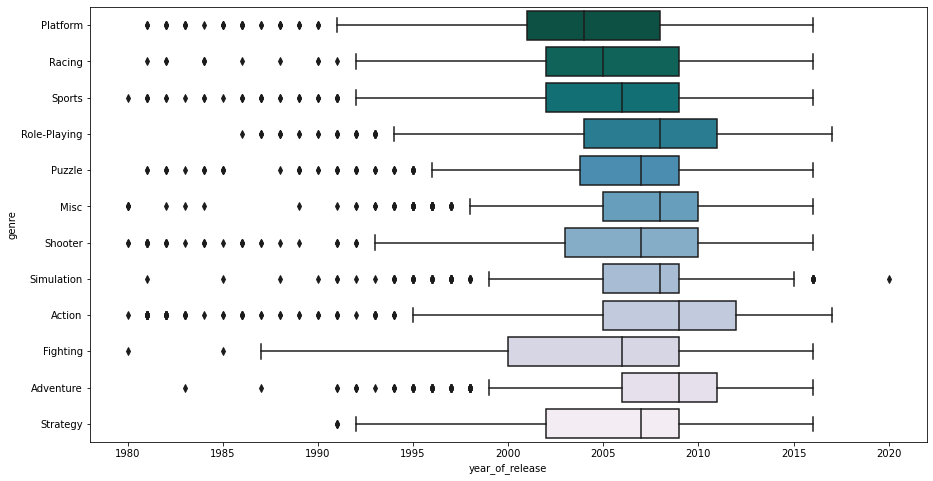

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(x=video_games_df["year_of_release"],y=video_games_df["genre"],palette="PuBuGn_r")
plt.show()

Most of the games were published between 2005-2010. A big amount of platform games were published in the year 2005/nearly 2005
and a big amount of adventure games were published in the year 2010/nearly 2010.

Text(0.5, 1.0, 'Average sales over the course of years')

<Figure size 1080x360 with 0 Axes>

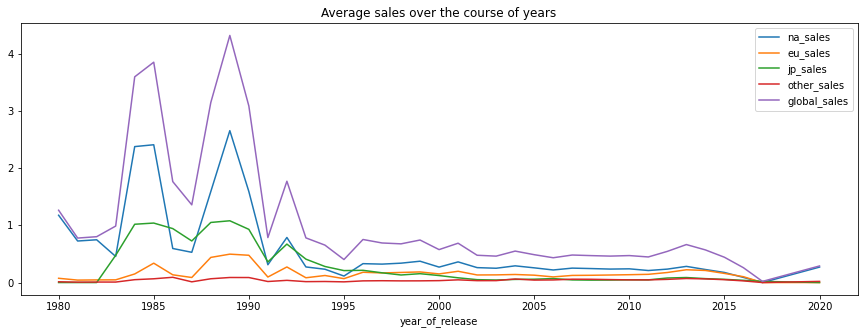

In [17]:
df1 = video_games_df.groupby(['year_of_release'])
plt.figure(figsize=(15,5))
df1_mean = df1['na_sales','eu_sales','jp_sales','other_sales','global_sales'].aggregate(np.mean)
df1_mean.plot(figsize=(15,5))
plt.title('Average sales over the course of years')

Video games sale was at its peak around 1990 which went on decreasing over the course of coming years

Text(0.5, 1.0, 'Sales as per Genre')

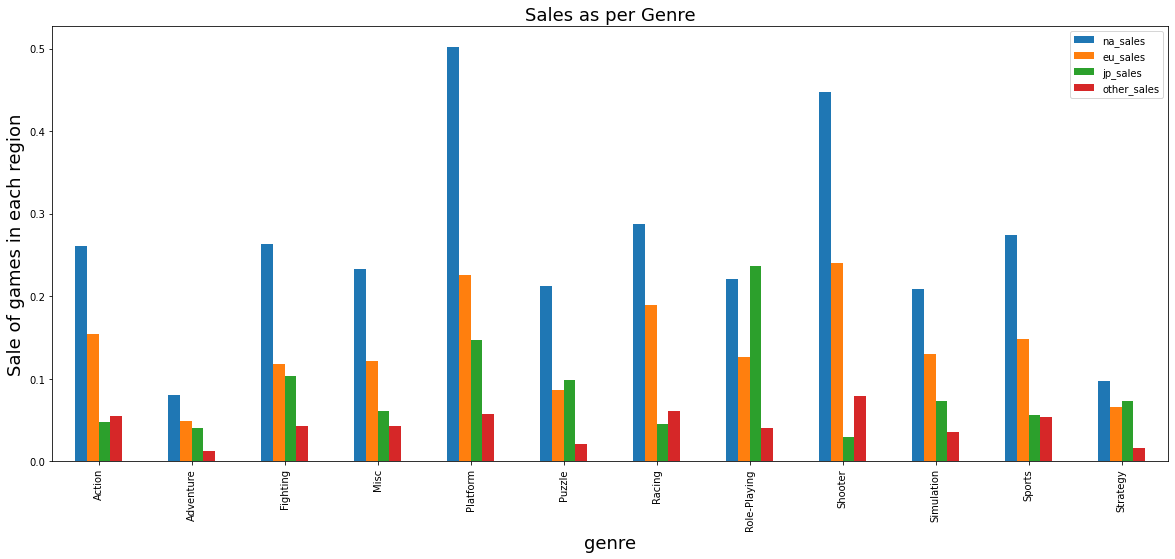

In [15]:
df3 = video_games_df.groupby(['genre'])
val = df3['na_sales','eu_sales','jp_sales','other_sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,9))
plt.xlabel('genre',fontsize=18)
plt.ylabel('Sale of games in each region',fontsize=18)
plt.title('Sales as per Genre',fontsize=18)

Platform specific games have highest sales in North America followed by Shooter and Sports games. In European regions Shooter games have slightly higher demand than Platform specific ones. Japan has a higher Role-playing games.

Text(0.5, 1.0, 'Sales as per Platform')

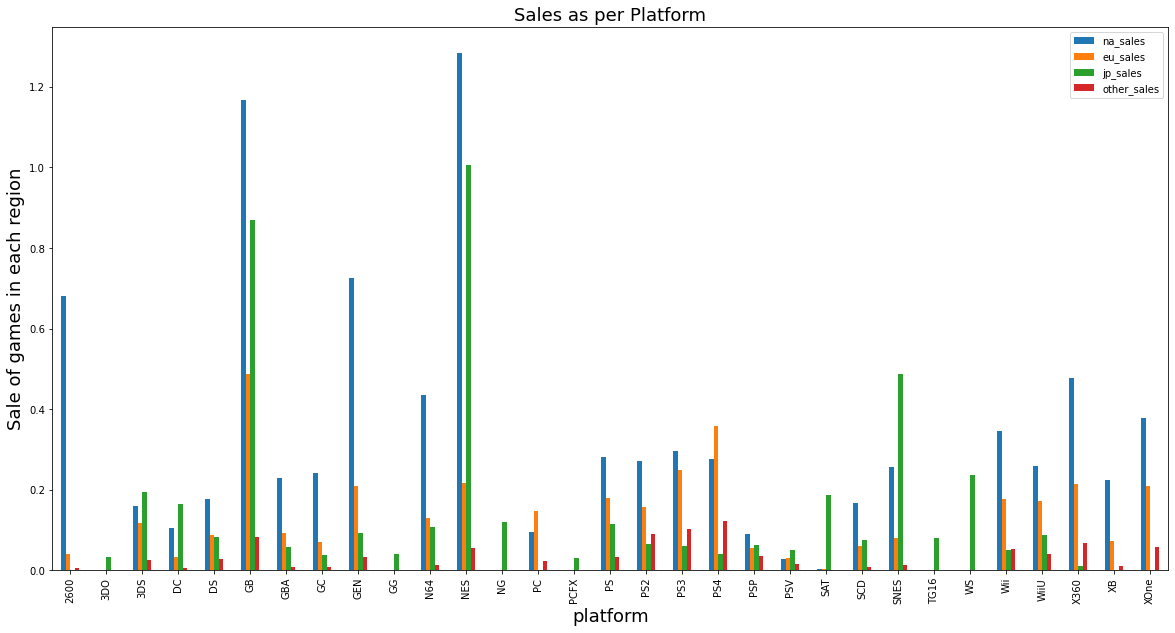

In [19]:
df3 = video_games_df.groupby(['platform'])

val = df3['na_sales','eu_sales','jp_sales','other_sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,10))
plt.xlabel('platform',fontsize=18)
plt.ylabel('Sale of games in each region',fontsize=18)
plt.title('Sales as per Platform',fontsize=18)

NES shows highest sales in all regions followed by GB. 2600 shows noticeable sale in North American region as compared to other regions.

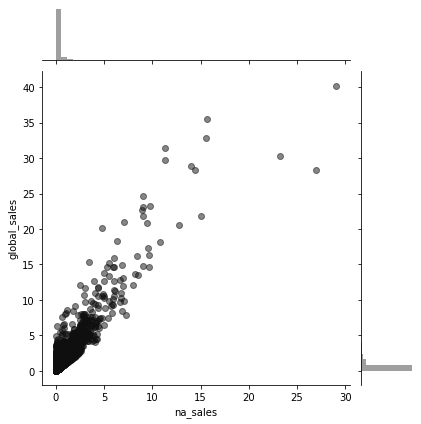

In [20]:
sns.jointplot(x='na_sales',y='global_sales',data=video_games_df,color="#0f0f0f80")

Games in North America had high sales which in turn contributed to the overall Global sales

In [16]:
df_genre = video_games_df.groupby('genre')
plot_genre = df_genre['na_sales','eu_sales','jp_sales','other_sales'].mean()

Text(0, 0.5, 'Revenue')

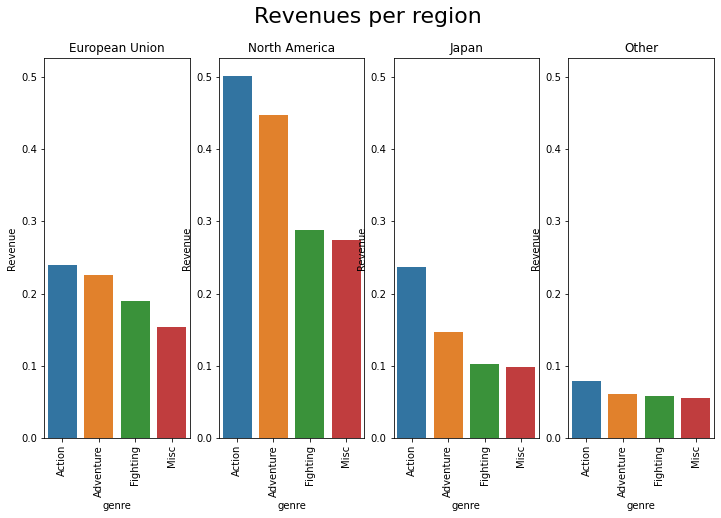

In [19]:
sort_genre = plot_genre.sort_values('eu_sales',ascending=False)
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'European Union', rotation=90)
sns.barplot(x=plot_genre.head(4).index, y=sort_genre.head(4).eu_sales)
plt.title('European Union')
plt.ylabel('Revenue')
plt.suptitle('Revenues per region',size=22)

sort_genre = plot_genre.sort_values('na_sales',ascending=False)
ax2 = fig.add_subplot(1,4,2,sharey=ax1)
ax2.set_xticklabels(labels = 'North America', rotation=90)
sns.barplot(x=plot_genre.head(4).index, y=sort_genre.head(4).na_sales)
plt.title('North America')
plt.ylabel('Revenue')

sort_genre = plot_genre.sort_values('jp_sales',ascending=False)
ax3 = fig.add_subplot(1,4,3,sharey=ax1)
ax3.set_xticklabels(labels = 'Japan', rotation=90)
sns.barplot(x=plot_genre.head(4).index, y=sort_genre.head(4).jp_sales)
plt.title('Japan')
plt.ylabel('Revenue')

sort_genre = plot_genre.sort_values('other_sales',ascending=False)
ax4 = fig.add_subplot(1,4,4,sharey=ax1)
ax4.set_xticklabels(labels = 'Other', rotation=90)
sns.barplot(x=plot_genre.head(4).index, y=sort_genre.head(4).other_sales)
plt.title('Other')
plt.ylabel('Revenue')


'Action' genre in North America has highest revenue followed by 'Adventure' genre. Rest all other genres in European, Japan and other regions have less revenue. But it can be seen that in every region 'Action' games has the highest revenue.

In [20]:
import plotly.graph_objects as go
# Video Game Sales by Year
yearwisesale =  video_games_df.groupby('year_of_release')['global_sales'].sum().reset_index()

In [21]:
# Yearwise Total Game Sales
fig = go.Figure(go.Bar(x=yearwisesale['year_of_release'],y=yearwisesale['global_sales'],
                       marker={'color': yearwisesale['global_sales'],'colorscale': 'teal'}))
fig.update_layout(title_text='Video Game Global Sales by Release Year',xaxis_title="Year",yaxis_title="Sum of Sales")
fig.show()

In 2007 there was high global sales of video games around 70K. It can also be observed that the sales were good during 2008,2009,2010 after that it gradually decreased.

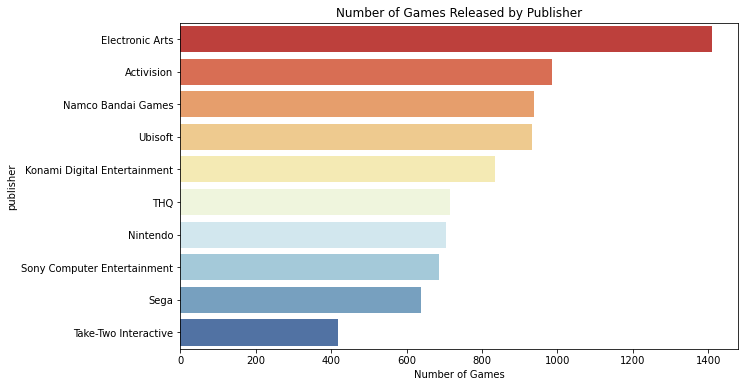

In [25]:
# Top 10 publishers by number of games released

games_by_publisher = video_games_df.groupby(['publisher']).count()['name'].sort_values(ascending=False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(y = games_by_publisher.index, x = games_by_publisher.values, palette = "RdYlBu")
plt.title('Number of Games Released by Publisher')
plt.xlabel('Number of Games')
plt.ylabel('publisher')
plt.show()

Electronic Arts has release the most number of games over the years.

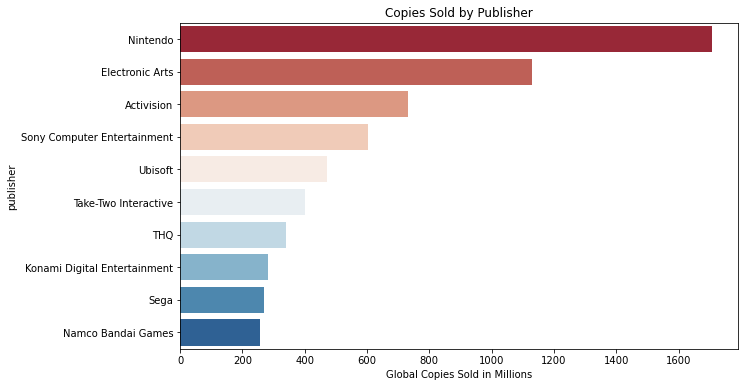

In [26]:
# Top 10 publishers by copies sold
sales_by_publisher = video_games_df.groupby(['publisher']).sum()['global_sales'].sort_values(ascending = False)[:10]
plt.figure(figsize=(10,6))
sns.barplot(y = sales_by_publisher.index, x = sales_by_publisher.values, palette = "RdBu")
plt.title('Copies Sold by Publisher')
plt.xlabel('Global Copies Sold in Millions')
plt.ylabel('publisher')
plt.show()

Although Electronic Arts has highest no. of release but Nintendo being the 7th in the 1st plot still holds the no. one place for most games sold. The top 3 publisher by sales are: Nintendo, Electronic Arts, Activision

### 7th Generation Console


In [22]:
# Dataframe containing only 7th Gen consoles
games_7th = video_games_df[(video_games_df['platform'] == 'Wii') | (video_games_df['platform'] == 'PS3') 
                           | (video_games_df['platform'] == 'X360')]
games_7th.shape

(3910, 16)

Text(0, 0.5, 'Global Sales')

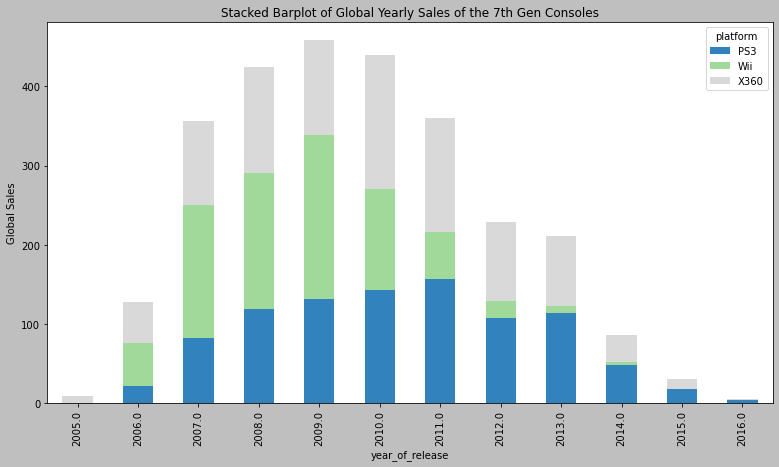

In [24]:
plt.style.use('grayscale')
yearlySales = games_7th.groupby(['year_of_release','platform']).global_sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'tab20c',  
                           grid=False,  figsize=(13,7))
plt.title('Stacked Barplot of Global Yearly Sales of the 7th Gen Consoles')
plt.ylabel('Global Sales')

PS3 sales become more and more successful , X360 sales also generally increased in 2009 while the Wii sales, which had a good start in the early years of 2006 and 2007 had it's lead deteriorated by the other 2.

Text(0, 0.5, 'Sales')

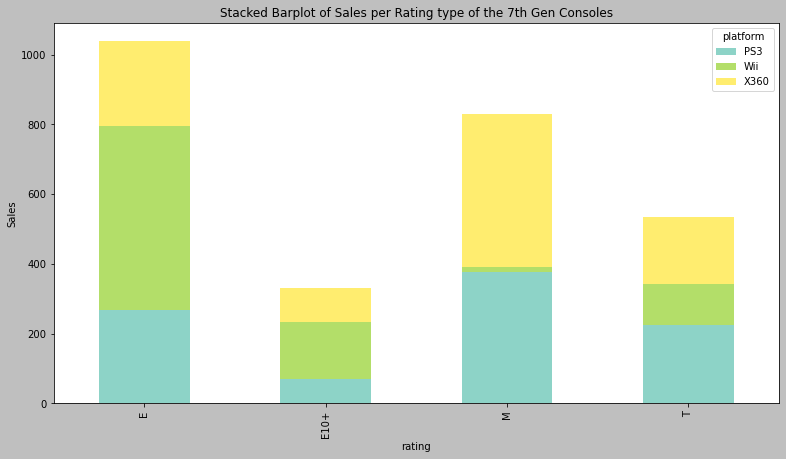

In [25]:
plt.style.use('grayscale')
ratingSales = games_7th.groupby(['rating','platform']).global_sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Set3', 
                           grid=False, figsize=(13,7))
plt.title('Stacked Barplot of Sales per Rating type of the 7th Gen Consoles')
plt.ylabel('Sales')

Wii mostly catered to family-oriented fun and therefore it made the largest sales at Rating E for Everyone while it sold negligible M for Mature games. On the other hand, the PS3 and XB360 sold the most M-rated games.

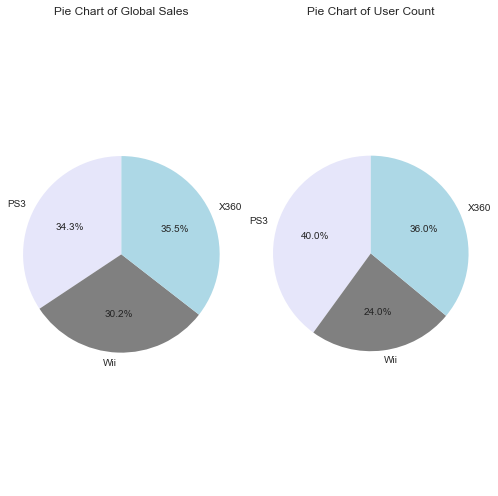

In [30]:
# Pie charts
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['lavender','gray','lightblue']
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.pie(
   games_7th.groupby('platform').global_sales.sum(),
    # with the labels being platform
    labels=games_7th.groupby('platform').global_sales.sum().index,
    # with no shadows
    shadow=False,
    # stating colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of Global Sales')
plt.subplot(122)
plt.pie(
   games_7th.groupby('platform').user_count.sum(),
    labels=games_7th.groupby('platform').user_count.sum().index,
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of User Count')
plt.tight_layout()
plt.show()

From the pie charts and earlier barplots, it seems that both the PS3 and the X360 were very near equal. So, this clearly shows Wii could not compete against its other 2 competitors.

### 8th Generation Console

In [27]:
games_8th = video_games_df[(video_games_df['platform'] == 'WiiU') | (video_games_df['platform'] == 'PS4')
                           | (video_games_df['platform'] == 'XOne')]
games_8th.shape


(787, 16)

Text(0, 0.5, 'Global Sales')

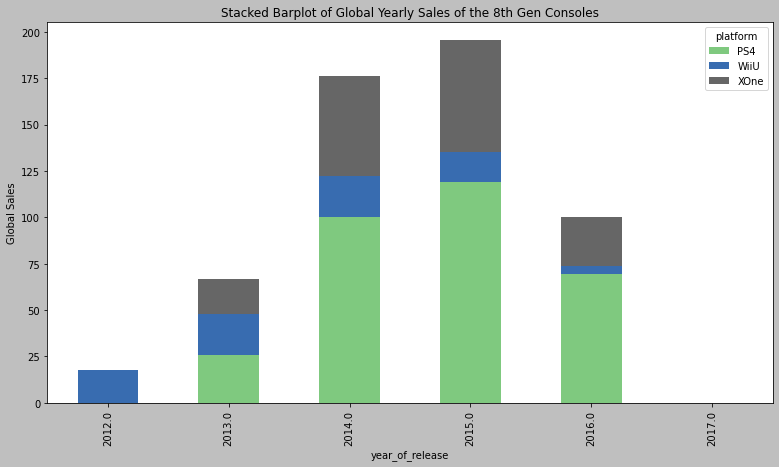

In [28]:
plt.style.use('grayscale')
yearlySales = games_8th.groupby(['year_of_release','platform']).global_sales.sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Accent',  
                           grid=False, figsize=(13,7))
plt.title('Stacked Barplot of Global Yearly Sales of the 8th Gen Consoles')
plt.ylabel('Global Sales')

PS4 global sales exceed those of both the WiiU and XOne. This is a very marked deviation from the 7th Gen when the PS3 and XB360 were neck to neck in sales performance over the years.

Text(0, 0.5, 'Sales')

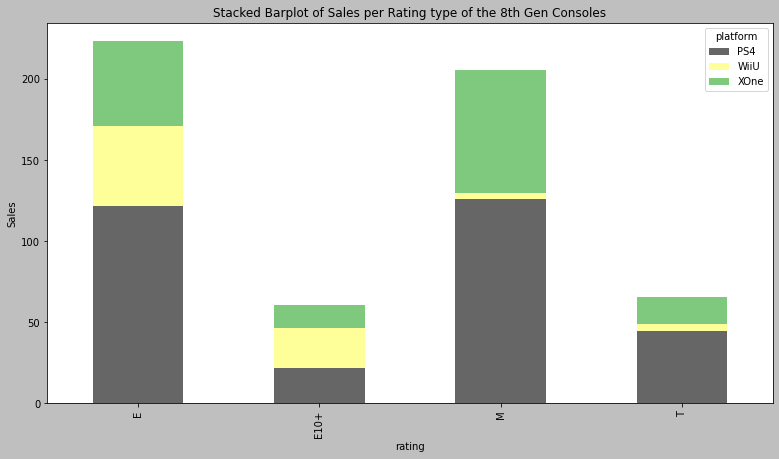

In [29]:
plt.style.use('grayscale')
ratingSales = games_8th.groupby(['rating','platform']).global_sales.sum()
ratingSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Accent_r', 
                           grid=False, figsize=(13,7))
plt.title('Stacked Barplot of Sales per Rating type of the 8th Gen Consoles')
plt.ylabel('Sales')

PS4 has catered to both the M and E audience. Unlike the 7th Gen where there was clear that the PS3 and XB360 produced games mostly for the M for Mature audience while the Wii was for the E for Everyone audience.

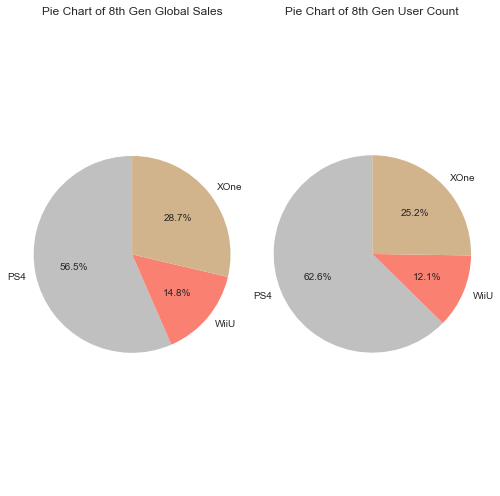

In [30]:
# Pie charts
# Create a list of colors 
plt.style.use('seaborn-white')
colors = ['silver','salmon','tan']
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.pie(
   games_8th.groupby('platform').global_sales.sum(),
    # with the labels being platform
    labels=games_8th.groupby('platform').global_sales.sum().index,
    # with no shadows
    shadow=False,
    # stating our colors
    colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen Global Sales')
plt.subplot(122)
plt.pie(
   games_8th.groupby('platform').user_count.sum(),
    labels=games_8th.groupby('platform').user_count.sum().index,
    shadow=False,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.title('Pie Chart of 8th Gen User Count')
plt.tight_layout()
plt.show()


So here comes out the clear winner after looking through both the generations PS4 being the all-rounder whether it is yearly sales, rating or user count.